In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
import tifffile as tiff
from cellpose import models, io
from cellpose import plot

In [3]:
abs_path = '/home/nanaa/dataset' #Chemin absolu des datasets
relative_path = '../../dataset' #Chemin relatif des dataset
images_path = abs_path+'/images_sophie' #Chemin des images
masks_path = abs_path+'/masks_sophie' #Chemin des masks
all_images = os.listdir(images_path) #Toutes les images
masks_result = abs_path+'/masks_resultat' #Chemin pour sauvegarder les resultats mask
images_result = abs_path+'/images_resultat' #ChKAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_M2_0_C0.tif

100%|██████████| 37/37 [00:00<00:00, 6329.60it/s]


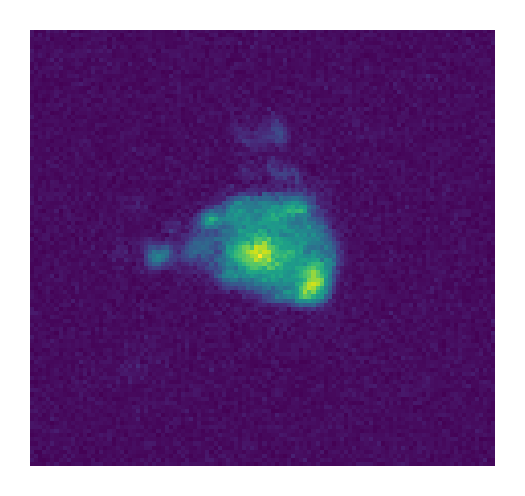

In [4]:
#Images test
img = io.imread(images_path+'/'+all_images[-1])

img = img.squeeze()
plt.figure(figsize=[2,2])
plt.imshow(img[25])
plt.axis('off')
plt.show()

In [5]:
model = models.Cellpose(gpu=True, model_type='cyto')


# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

for file in all_images:
    img = io.imread(images_path+'/'+file)
    masks, flows, styles, diams = model.eval(img, do_3D=True, channels=channels)
    
    io.imsave(masks_result+'/'+file, masks)
    
    #save results
#     io.masks_flows_to_seg(img, masks, flows, diams, file, channels)
    
    #to png
#     io.save_to_png(img, masks, flows, file)
    


100%|██████████| 45/45 [00:00<00:00, 4446.57it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/nanaa/dataset/masks_resultat/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_W3_18_C0.tif'

In [17]:
"""
fig = plt.figure(figsize=(3,3))
print(img.shape)
img_ = np.expand_dims(img[25],-1)
msk_ = np.expand_dims(masks[25], -1)
print(img_.shape)
plot.show_segmentation(fig, img_, msk_, flows[0], channels=channels)
plt.tight_layout()
plt.show()
"""

'\nfig = plt.figure(figsize=(3,3))\nprint(img.shape)\nimg_ = np.expand_dims(img[25],-1)\nmsk_ = np.expand_dims(masks[25], -1)\nprint(img_.shape)\nplot.show_segmentation(fig, img_, msk_, flows[0], channels=channels)\nplt.tight_layout()\nplt.show()\n'

In [18]:
"""
from cellpose import loss_fn
masks = os.listdir("dataset/masks_sophie")
masks_predict = os.listdir("../dataset/masks_resultat")
print(len(masks))
print(len(masks_predict))
loss_fn(masks, masks_predict)
"""

'\nfrom cellpose import loss_fn\nmasks = os.listdir("dataset/masks_sophie")\nmasks_predict = os.listdir("../dataset/masks_resultat")\nprint(len(masks))\nprint(len(masks_predict))\nloss_fn(masks, masks_predict)\n'